In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
from bs4 import BeautifulSoup

In [4]:
movies = pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\movies.csv")
links = pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\links.csv")
ratings = pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\ratings.csv")
tags = pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\tags.csv")

In [5]:
ratings['userId'].nunique()

610

In [11]:
valueCount = ratings['movieId'].value_counts()
rating_max = valueCount.idxmax()
movies[movies['movieId'] == rating_max]


,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [13]:
mat_id = df_movies[df_movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

In [17]:
tag_mat = df_tags[df_tags['movieId'] == mat_id]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [21]:
terminatory_id = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']

In [26]:
terminatory_id=teminatory_id["movieId"].values[0]

In [27]:
ratings[ratings['movieId'] == terminatory_id]['rating'].mean()

3.970982142857143

In [31]:
fight_clb_id = movies[movies['title'] == 'Fight Club (1999)']

In [33]:
fight_clb_id=fight_clb_id['movieId'].values[0]

In [34]:
fight_clb = ratings[ratings['movieId'] == fight_clb_id]

In [35]:
fight_clb

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


C:\Users\kalag\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalag\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

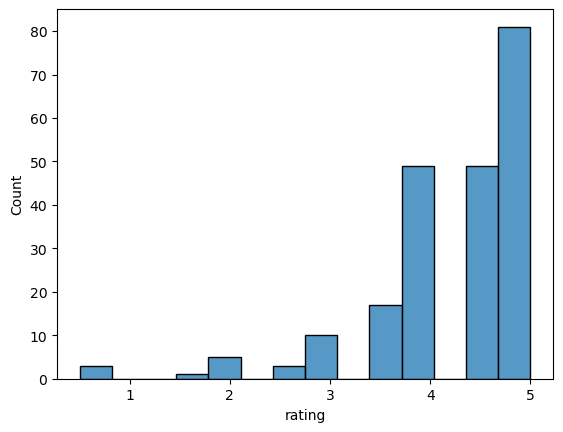

In [37]:
sns.histplot(fight_clb['rating'])

In [42]:
grouped = ratings.groupby(ratings['movieId'])['rating'].agg(['count','mean']).reset_index()

In [43]:
merged_data = pd.merge(movies,grouped,on='movieId',how='inner')

In [46]:
new_data = merged_data[merged_data['count']>50]

In [50]:
max_val = new_data['mean'].max()

In [51]:
new_data[new_data['mean'] == max_val]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [52]:
new_data.sort_values(by='count',ascending =False).head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [56]:
new_data[new_data['genres'].str.contains('Sci-Fi')].sort_values(by='count',ascending=False)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [40]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [41]:
merged_df = pd.merge(new_data,df_links,on='movieId')

In [42]:
merged_df['imdbRatings'] = merged_df['imdbId'].apply(scrapper)

In [44]:
merged_df

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      436 non-null    int64  
 1   title        436 non-null    object 
 2   genres       436 non-null    object 
 3   count        436 non-null    int64  
 4   mean         436 non-null    float64
 5   imdbId       436 non-null    int64  
 6   tmdbId       436 non-null    float64
 7   imdbRatings  436 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 27.4+ KB


In [56]:

merged_df['imdbRatings'] = merged_df['imdbRatings'].astype(float)

hr_m = merged_df[merged_df['imdbRatings'] == merged_df['imdbRatings'].max()]

hr_m['movieId'].values[0]

318

In [58]:
sciFi = merged_df[merged_df['genres'].str.contains('Sci-Fi')]
sciFi['imdbRatings'] = sciFi['imdbRatings'].astype(float)
sciFi_rating = sciFi[sciFi['imdbRatings'] == sciFi['imdbRatings'].max()]
sciFi_rating['movieId'].values[0]

79132
